# ADS, fall 2017. Homework 3

### Q1 (10 points). P-values and hypothesis testing
Suppose that a multiple regression with 10 regressors gave the following p-values for each of them (the value below are NOT in percents yet):

0.02, 0.1, 3e-15, 0.5, 0.04, 0.001, 0.06, 0.03, 0.045, 5e-3.

For how many regressors you would reject the null-hypothesis that their corresponding regression coefficient is zero? Please explain.

#### Answer:

There are $7$ p-values in the list above that are less than the significance level of 0.05 and therefore the null hypothesis that their corresponidng regression coefficient is zero can be rejected.

### Q2 (15 points). Confidence intervals
Assume we perform a regression and get an estimate 100 for the slope coefficient for the regressor of interest. Select all statements that can not be true for its confidence intervals:

a. 99%-conficence interval is [99.99,100.01]

b. 95%-confidence interval is [-300, 300]

c. 98%-confidence interval is [95, 105], while 90%-confidence interval is [90, 110].

d. 99%-confidence interval is [99,100]

Explain your choices

#### Answer:

b) The coefficient should lie in the middle of the confidence interval but in this case, confidence interval is centered at 0.

c) If we're 98% confident about a certain set of result falling in a range, the lower confidence would decrease the interval. But in this option the interval is increasing which is incoreect.

d) Again, the confidence interval should be centered at 100 but here its 99.5

### Q3 (15 points). 

A linear regression model is fit over a dataset with 181 observations and 'n' features. The estimate for the regression coefficient for one of the features is 911.0964 while its standard error is 344.185.

What will be the 
a) 95, 99 and 90% confidence intervals? 
b) p-values?

a) 
- for 95%
    911.0964 $\pm$ 344.185(1.96)
    confidence interval = [236.493, 1585.699]
 
- for 99%
    911.0964 $\pm$ 344.185(2.57)
    confidence interval = [26.541, 1795.652]
   
- for 90%
    911.0964 $\pm$ 344.185(1.64)
    confidence interval = [346.633, 1475.559]

b)
One-Tail p-values:

- for 95% p-value = 0.975
- for 99% p-value = 0.995
- for 90% p-value = 0.95

### Q4.(ACS Data Set, 30pts)

We'll be using the ACS dataset provided below.

Survey:           ACS 2015 (5-Year Estimates)
Dataset:          Social Explorer Tables:  ACS 2015 (5-Year Estimates)

**VARIABLE DESCRIPTIONS:** (Data was collected in 2015)

Tables:

      1. Population Density (per Sq. Mile)
         Universe:  Total Population
         Name:      T2
         Variables:
            T002_001:   Total Population
            T002_002:   Population Density (Per Sq. Mile)
            T002_003:   Area (Land)


      2. Average Household Size
         Universe:  Occupied Households
         Name:      T21
         Variables:
            T021_001:   Average Household Size



      3. Median Household Income (In <DollarYear> Inflation Adjusted Dollars)
         Universe:  Households
         Name:      T57
         Variables:
            T057_001:   Median Household Income (In 2015 Inflation Adjusted Dollars)


      4. Per Capita Income (In <DollarYear> Inflation Adjusted Dollars)
         Universe:  Total Population
         Name:      T83
         Variables:
            T083_001:   Per Capita Income (In 2015 Inflation Adjusted Dollars)

 
      5. Median Gross Rent
          Universe:  Renter-occupied housing units paying cash rent
          Name:      T104
          Variables:
             T104_001:   Median Gross Rent


      6. Ratio of Income in 2015 to Poverty Level
          Universe:  Population for whom poverty status Is determined
          Name:      T117
          Variables:
             T117_001:   Population for Whom Poverty Status Is Determined:

      7. Average Commute to Work (in Min)
          Universe:  Average Commute to Work (in min)
          Name:      T147
          Variables:
             T147_001:   Average Commute to Work (in Min)


Run the regression modeling the median household income through all the features above and analyse its statistics. Based on the results, suppose X(s) is the predicted median household income for the household of the size s and if deltaX=X(s+1)-X(s) then calculate:
* (a) What's the expected price E(X)?
* (b) What's the probability that X > \$15000?  
* (c) What's the two-sided 80% confidence interval of X?
* (d) What's the one-sided 98% confidence interval of X? Calculate the upper interval $[X_0, +\infty)$,

In [9]:
import pandas as pd
import numpy as np
import pylab as pl
import os
%pylab inline
from __future__ import print_function
import statsmodels.formula.api as smf 
from scipy.stats import t

Populating the interactive namespace from numpy and matplotlib


In [10]:
data=pd.read_csv('file4.csv')

In [11]:
data.head()

,Unnamed: 0,Geo_FIPS,Geo_GEOID,Population_Density,Average_Household_Size,Median_Household_Income,Per_Capita_Income,Median_Value,Poverty_Status,Average_Commute_to_Work
0,2,36061000202,14000US36061000202,67374.02,2.15,29684.0,27355.0,533600.0,7768,31.0
1,4,36061000600,14000US36061000600,128089.30,2.92,19863.0,12802.0,521200.0,12378,30.0
2,5,36061000700,14000US36061000700,89695.05,1.92,117841.0,89303.0,1035900.0,8794,25.0
3,6,36061000800,14000US36061000800,112643.90,2.63,27137.0,17426.0,588100.0,9465,33.0
4,7,36061000900,14000US36061000900,12507.00,2.14,147500.0,111599.0,1000000.0,1626,26.0


In [12]:
y = data['Median_Household_Income']

In [31]:
lm=smf.ols(formula='data.Median_Household_Income ~ data.Population_Density+ data.Average_Household_Size+data.Per_Capita_Income+\
          data.Per_Capita_Income+ data.Median_Value+ data.Poverty_Status+ data.Average_Commute_to_Work', data=data ).fit()

In [32]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     data.Median_Household_Income   R-squared:                       0.832
Model:                                      OLS   Adj. R-squared:                  0.827
Method:                           Least Squares   F-statistic:                     182.6
Date:                          Mon, 06 Nov 2017   Prob (F-statistic):           6.22e-83
Time:                                  17:56:50   Log-Likelihood:                -2585.8
No. Observations:                           229   AIC:                             5186.
Df Residuals:                               222   BIC:                             5210.
Df Model:                                     6                                         
Covariance Type:                      nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     1.535e+04   1.24e+04      1.234      0.219   -9165.448    3.99e+04
data.Population_Density          0.0318      0.041      0.768      0.443      -0.050       0.113
data.Average_Household_Size   1.121e+04   4621.474      2.426      0.016    2104.409    2.03e+04
data.Per_Capita_Income           0.9073      0.049     18.392      0.000       0.810       1.005
data.Median_Value                0.0043      0.004      1.085      0.279      -0.004       0.012
data.Poverty_Status             -0.8155      0.603     -1.353      0.177      -2.003       0.372
data.Average_Commute_to_Work  -612.3823    324.227     -1.889      0.060   -1251.338      26.574
==============================================================================
Omnibus:                       34.484   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.301
Skew:                           0.678   Prob(JB):                     4.95e-19
Kurtosis:                       5.645   Cond. No.                     9.98e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.98e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### a)

In [21]:
print ('The expected price through the model is {}'.format(np.mean(lm.predict())))

The expected price through the model is 92247.8471616


### b)

In [55]:
predicted_data= pd.Series(data=lm.predict())

In [56]:
norm= np.mean(lm.predict())
for i in range(len(predicted_data)):
    predicted_data[i]= abs(predicted_data[i]-norm)

predicted_data.head()
    

0    48856.308327
1    54699.208655
2    10479.179306
3    53419.681893
4    35802.448997
dtype: float64

In [57]:
print('The probability of predicted median household income greater than $15000 is: {}'.format((np.sum(predicted_data[predicted_data>15000])/np.sum(predicted_data))))

The probability of predicted median household income greater than $15000 is: 0.953050781183


### c)

In [53]:
q = (1-0.8)/2
lowerBound = t.ppf(q, lm.df_resid) * 4621.473840+ 11211.981640
upperBound = t.isf(q, lm.df_resid) * 4621.473840+ 11211.981640
print ('The two-sided 80% confidence interval for predicted income is:[{},{}]'.format(lowerBound,upperBound))

The two-sided 80% confidence interval for predicted income is:[5271.64722637,17152.3160536]


### d)

In [54]:
q=(1-0.98)
lowerBound = t.ppf(q, lm.df_resid) * 4621.473840+ 11211.981640

print ('The one-sided 98% confidence interval of predicted income is [{},{}]'.format(lowerBound,np.inf))

The one-sided 98% confidence interval of predicted income is [1664.54240435,inf]


### Question 5

We'll be using the breast cancer dataset from sklearn for this problem.

a) For the given labeled data perform PCA and visualize (using bar-plot) the fraction of variance explained by each principle components.

b) Visualize the observations along the first two principle components with colors depending on the label.

In [47]:
from sklearn.datasets import load_breast_cancer
X,y = load_breast_cancer(return_X_y=True)

In [49]:
data_i=pd.DataFrame(np.concatenate((y.reshape(len(y),1),X),axis=1))
#data_i.columns=["Species","Sepal_lenth","Sepal_width","Petal_length","Petal_width"]
data_i.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


[  9.82044672e-01   1.61764899e-02   1.55751075e-03   1.20931964e-04]


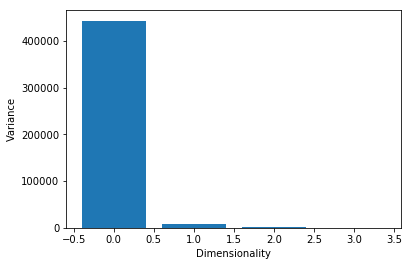

In [50]:
n=4
from sklearn.decomposition import PCA
pca = PCA(n)
Xproj = pca.fit_transform(X)
eigenvalues = pca.explained_variance_
print (pca.explained_variance_ratio_)
plt.bar(np.arange(n), eigenvalues);
plt.xlabel("Dimensionality")
plt.ylabel("Variance")
plt.show()

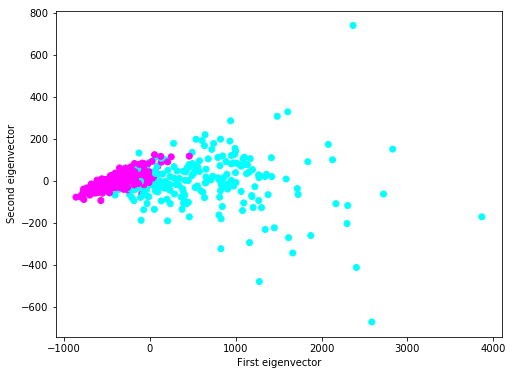

In [51]:
plt.figure(2, figsize=(8, 6))
plt.clf()
# Plot the training points
plt.scatter(Xproj[:, 0], Xproj[:, 1], c=y, cmap=plt.cm.cool)
plt.xlabel('First eigenvector')
plt.ylabel('Second eigenvector')
plt.show()